In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [505]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [506]:
df.shape

(29922, 6)

In [507]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

In [508]:
df['ordered_at']

0        2018-01-01 11:30:00
1        2018-01-01 11:30:00
2        2018-01-01 12:14:54
3        2018-01-01 12:14:54
4        2018-01-01 12:14:54
                ...         
29917    2018-06-26 03:56:13
29918    2018-03-03 10:06:21
29919    2018-04-05 17:33:24
29920    2018-07-20 09:10:01
29921    2018-07-13 09:20:21
Name: ordered_at, Length: 29922, dtype: object

## Fix column datatypes

### First remove unnecessary $ symbols

In [509]:
df['price'] = df['price'].replace({'\$': ''}, regex=True)
df['line_total'] = df['line_total'].replace({'\$': ''}, regex=True)

### Change ordered_at to datetime

In [510]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

### Change price and line_total to float

In [511]:
df = df.astype({'price':'float32'})
df = df.astype({'line_total':'float32'})
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float32
quantity               int64
line_total           float32
dtype: object

## Drop if duplicated or null

### Drop if duplicated

In [512]:
df = df.drop_duplicates(keep=False)
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [513]:
df.isnull().sum()

order_id         0
name          1474
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [514]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


### Drop if null

In [515]:
df = df.dropna()
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


## Set line_total = price * quantity if different
## Remove if line total < 0

### Incorrect line total count before update incorrect line totals

In [516]:
# Check how many line_totals are incorrect
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

27

### Incorrect line total count after update incorrect line totals

In [517]:
def correct_line_total(row):
    return row['price'] * row['quantity']

issa = df.apply(lambda x: correct_line_total(x), axis=1)

# Suppress false positive SettingWithCopyWarning
df = df.copy()

df.loc[:, 'line_total'] = issa.values


In [518]:
# Check how many line_totals are incorrect
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

### Before negatives removal

In [519]:
df[df['line_total'] < 0].shape[0]

276

### After negatives removal

In [520]:
negatives = df[df['line_total'] < 0]
negatives
df = df.drop ( negatives.index )
df[df['line_total'] < 0].shape[0]

0

In [521]:
df.describe()

,order_id,price,quantity,line_total
count,27105.000000,27105.000000,27105.000000,27105.000000
mean,14995.510238,2.512931,1.999779,5.029183
std,2888.511015,1.058688,0.819353,3.084671
min,10000.000000,0.500000,1.000000,0.500000
25%,12502.000000,1.500000,1.000000,2.500000
50%,14978.000000,2.500000,2.000000,4.500000
75%,17509.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


### Get value between "" in name and put it in category column

In [522]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [523]:
def extract_category(item):
    return re.findall(r'"(.*?)"', item)[0]
    
categories = df['name'].apply(lambda item: extract_category(item))
df = df.assign(categories=categories)
df.head()

,order_id,name,ordered_at,price,quantity,line_total,categories
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET
...,...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0,CONE
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5,SORBET
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0,SORBET
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5,ICE CREAM


#### Analysis, finally!

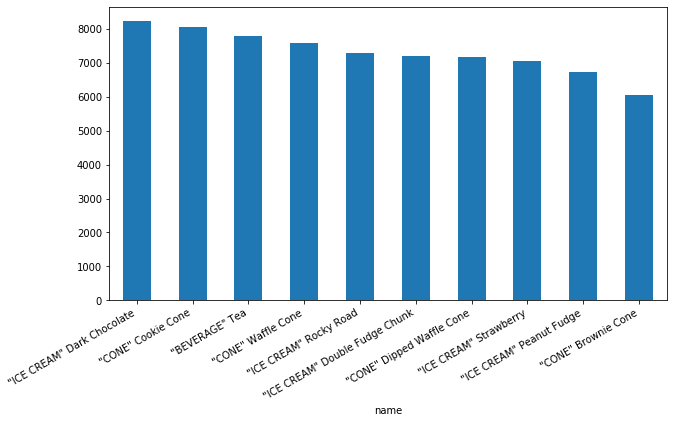

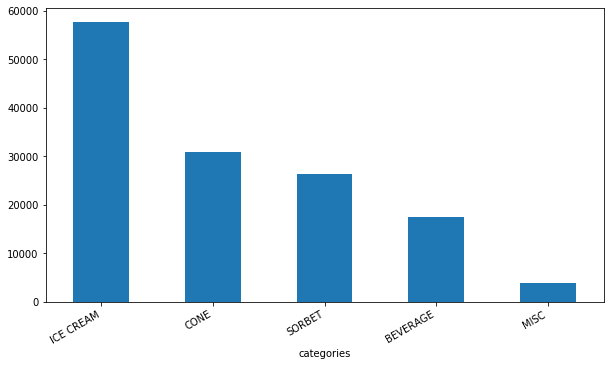

In [528]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

f, ax = plt.subplots(figsize=(10, 6))
df.groupby('categories')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()